In [11]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [51]:
def play_wave(f):
    p = pyaudio.PyAudio()
    
    volume = 0.5     # range [0.0, 1.0]
    fs = 44100       # sampling rate, Hz, must be integer
    duration = 2.0   # in seconds, may be float

    # generate samples, note conversion to float32 array
    samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32).tobytes()
    
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)
    
    # play
    stream.write(samples)
    
    stream.stop_stream()
    stream.close()
    
    p.terminate()
    # plot figure
    #plt.figure()
    #plt.plot(np.arange(8000),np.sin(2*np.pi*np.arange(fs*duration)*f/fs)[:8000])
    return

def combine_waves(f1,f2):
    p = pyaudio.PyAudio()
    
    volume = 0.5     # range [0.0, 1.0]
    fs = 44100       # sampling rate, Hz, must be integer
    duration = 2.0   # in seconds, may be float

    # generate samples, note conversion to float32 array
    samples1 = (np.sin(2*np.pi*np.arange(fs*duration)*f1/fs)).astype(np.float32)
    samples2 = (np.sin(2*np.pi*np.arange(fs*duration)*f2/fs)).astype(np.float32)
    samples = (samples1+samples2).tobytes()
    
    # plot figure
    plt.figure(figsize=(10,18))
    plt.subplot(411)
    plt.plot(np.arange(8000),samples1[:8000])
    plt.title('Wave 1')
    plt.subplot(412)
    plt.plot(np.arange(8000),samples2[:8000])
    plt.title('Wave 2')
    plt.subplot(413)
    plt.plot(np.arange(8000),samples1[:8000],'b-')
    plt.plot(np.arange(8000),samples2[:8000],'r-')
    plt.title('Wave 1 (blue) and wave 2 (red)')
    plt.subplot(414)
    plt.plot(np.arange(8000),samples1[:8000]+samples2[:8000])
    plt.title('Wave 1 + wave 2')
    
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)
    
    # play
    stream.write(samples)
    
    stream.stop_stream()
    stream.close()
    
    p.terminate()
    return

Create and listen to the first sample wave

In [52]:
f1 = 315.0 # sine frequency, Hz, may be float
play_wave(f1)

Create and listen to the second sample wave

In [53]:
f2 = 310.0 # sine frequency, Hz, may be float
play_wave(f1)

Combine the two waves. You can change f1 and f2 to look at what happens to the wave envelope when the frequencies are close together or far away: try choosing values so that f1 = f2+0.5, for example, and then increase the difference between the two (e.g. f1=f2+30).

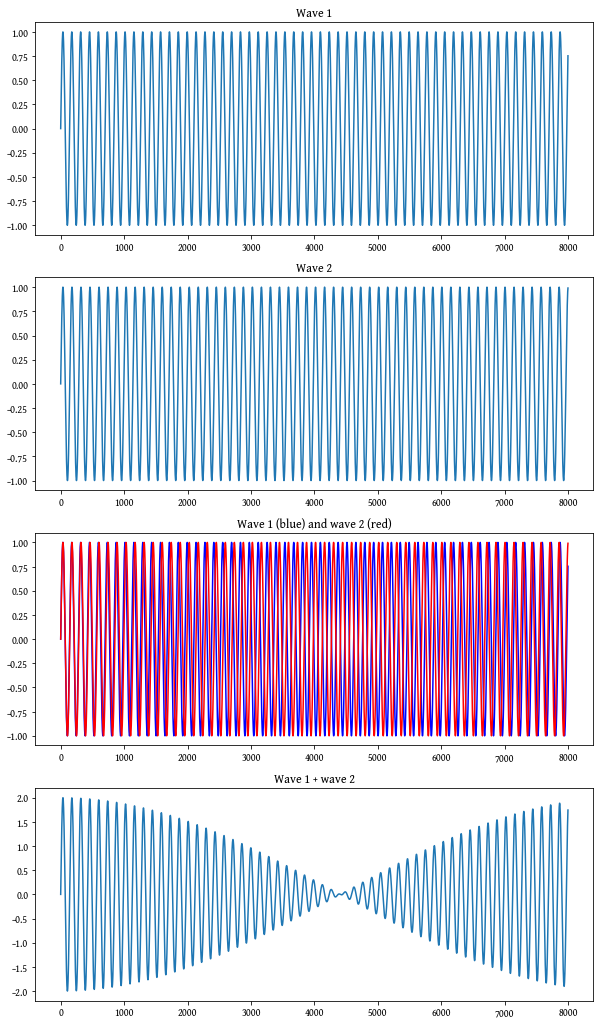

In [58]:
f1 = 315.0
f2 = 310.0 
combine_waves(f1,f2)